In [1]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from ISLP import load_data
from ISLP.svm import plot as plot_svm
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures, LabelBinarizer
from sklearn.model_selection import KFold, GridSearchCV
from mlxtend.plotting import plot_decision_regions

# Table Of Contents

- [Exercise 9.7.4](#Exercise-9.7.4),
- [Exercise 9.7.5 (a)](#Exercise-9.7.5-(a)),
- [Exercise 9.7.5 (b)](#Exercise-9.7.5-(b)),
- [Exercise 9.7.5 (c)](#Exercise-9.7.5-(c)),
- [Exercise 9.7.5 (d)](#Exercise-9.7.5-(d)),
- [Exercise 9.7.5 (e)](#Exercise-9.7.5-(e)),
- [Exercise 9.7.5 (f)](#Exercise-9.7.5-(f)),
- [Exercise 9.7.5 (g)](#Exercise-9.7.5-(g)),
- [Exercise 9.7.5 (h)](#Exercise-9.7.5-(h)),
- [Exercise 9.7.5 (i)](#Exercise-9.7.5-(i)),
- [Exercise 9.7.6 (a)](#Exercise-9.7.6-(a)),
- [Exercise 9.7.6 (b)](#Exercise-9.7.6-(b)),
- [Exercise 9.7.6 (c)](#Exercise-9.7.6-(c)),
- [Exercise 9.7.6 (d)](#Exercise-9.7.6-(d)),
- [Exercise 9.7.7 (a)](#Exercise-9.7.7-(a)),
- [Exercise 9.7.7 (b)](#Exercise-9.7.7-(b)),
- [Exercise 9.7.7 (c)](#Exercise-9.7.7-(c)),
- [Exercise 9.7.7 (d)](#Exercise-9.7.7-(d)),
- [Exercise 9.7.8 (a)](#Exercise-9.7.8-(a)),
- [Exercise 9.7.8 (b)](#Exercise-9.7.8-(b)),
- [Exercise 9.7.8 (c)](#Exercise-9.7.8-(c)),
- [Exercise 9.7.8 (d)](#Exercise-9.7.8-(d)),
- [Exercise 9.7.8 (e)](#Exercise-9.7.8-(e)),
- [Exercise 9.7.8 (f)](#Exercise-9.7.8-(f)),
- [Exercise 9.7.8 (g)](#Exercise-9.7.8-(g)),
- [Exercise 9.7.8 (h)](#Exercise-9.7.8-(h)).

### Exercise 9.7.4

 Generate a simulated two-class data set with 100 observations and
two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector
machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data. Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.

__Answer__: 

- the best classification method in this setting is radial RBF kernel & polynomial with degree=4.

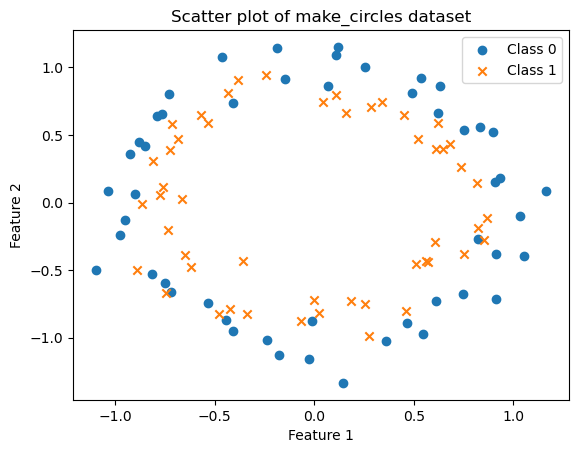

In [2]:
X, y = make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', marker='x')

plt.title('Scatter plot of make_circles dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend();

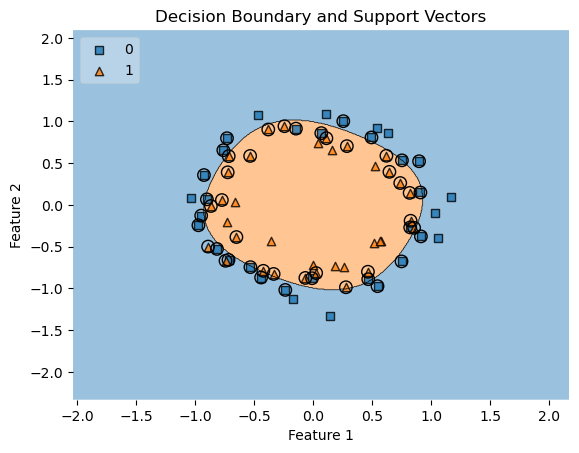

In [3]:
clf_poly = SVC(kernel='poly', degree=4, random_state=0, C=0.5)
clf_poly.fit(X_train, y_train)

plot_decision_regions(X_train, y_train, clf=clf_poly, legend=2, X_highlight=clf_poly.support_vectors_)
plt.title('Decision Boundary and Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2');

In [4]:
train_acc = accuracy_score(y_train, clf_poly.predict(X_train))
test_acc = accuracy_score(y_test, clf_poly.predict(X_test))

print(f'Polynomial kernel (degree=4); train acc={train_acc}, test acc={test_acc}')

Polynomial kernel (degree=4); train acc=0.8571428571428571, test acc=0.9


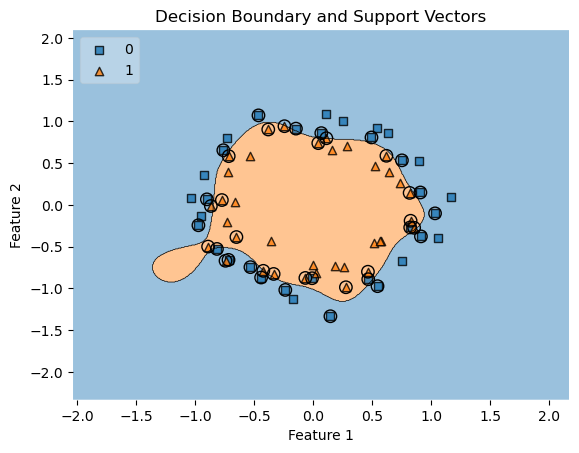

In [5]:
clf_rbf = SVC(kernel='rbf', gamma=5, C=15, random_state=0)
clf_rbf.fit(X_train, y_train)

plot_decision_regions(X_train, y_train, clf=clf_rbf, legend=2, X_highlight=clf_rbf.support_vectors_)
plt.title('Decision Boundary and Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2');

In [6]:
train_acc = accuracy_score(y_train, clf_rbf.predict(X_train))
test_acc = accuracy_score(y_test, clf_rbf.predict(X_test))

print(f'RBF kernel (gamma=5); train acc={train_acc}, test acc={test_acc}')

RBF kernel (gamma=5); train acc=0.9, test acc=0.9


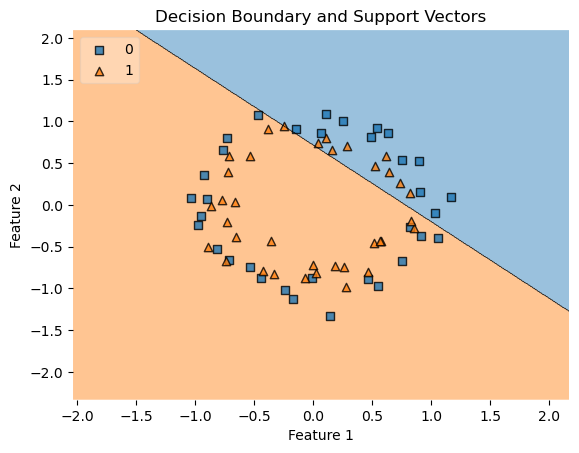

In [7]:
clf_linear = LinearSVC(C=1e-3, random_state=0, dual='auto')
clf_linear.fit(X_train, y_train)

plot_decision_regions(X_train, y_train, clf=clf_linear, legend=2, )
plt.title('Decision Boundary and Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2');

In [8]:
train_acc = accuracy_score(y_train, clf_linear.predict(X_train))
test_acc = accuracy_score(y_test, clf_linear.predict(X_test))

print(f'Linear SVM; train acc={train_acc}, test acc={test_acc}')

Linear SVM; train acc=0.5428571428571428, test acc=0.5


### Exercise 9.7.5

We have seen that we can fit SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will see now that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

#### Exercise 9.7.5 (a)

Generate a data set with $n = 500$ and $p = 2$, such that observations belong to two classes with a quadratic decision boundary between them. For instance, you can do this as follows:

```python
rng = np.random.default_rng(5)
x1 = rng.uniform(size=500) - 0.5
x2 = rng.uniform(size=500) - 0.5
y = x1**2 - x2**2 > 0
```

In [9]:
rng = np.random.default_rng(5)
x1 = rng.uniform(size=500) - 0.5
x2 = rng.uniform(size=500) - 0.5
y = x1**2 - x2**2 > 0

#### Exercise 9.7.5 (b)

Plot the observations, colored according to their class labels. Your plot should display $X_1$ on the $x$-axis, and $X_2$ on the $y$-axis.

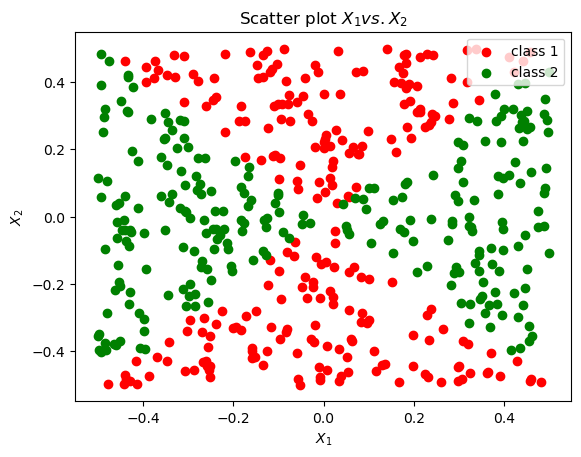

In [10]:
plt.scatter(x1[y == False], x2[y == False], color='red', label='class 1')
plt.scatter(x1[y == True], x2[y == True], color='green', label='class 2')
plt.title("Scatter plot $X_1 vs. X_2$")
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend();

#### Exercise 9.7.5 (c)

Fit a logistic regression model to the data, using $X_1$ and $X_2$ as predictors.

In [11]:
lr = LogisticRegression()
X_train = np.vstack((x1, x2)).T
lr.fit(X_train, y)

LogisticRegression()

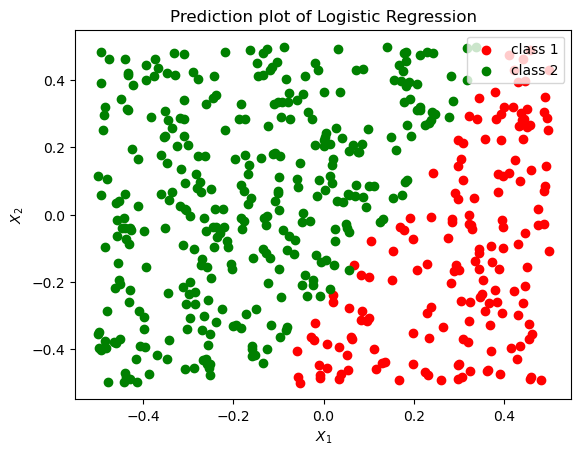

In [12]:
y_train_hat = lr.predict(X_train)

plt.scatter(x1[y_train_hat == False], x2[y_train_hat == False], color='red', label='class 1')
plt.scatter(x1[y_train_hat == True], x2[y_train_hat == True], color='green', label='class 2')
plt.title("Prediction plot of Logistic Regression")
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend();

In [13]:
X = np.column_stack((x1, x2))
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.4, random_state=0)

clf = LogisticRegression().fit(X_train, y_train)

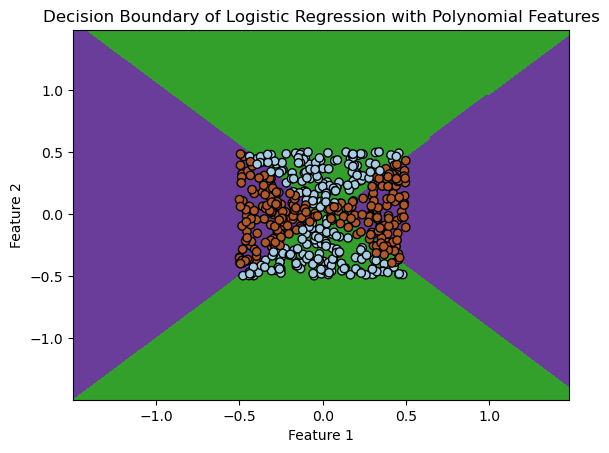

In [14]:
h = .02
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                       np.arange(x2_min, x2_max, h))

Z = clf.predict(poly.transform(np.c_[xx1.ravel(), xx2.ravel()]))

Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Logistic Regression with Polynomial Features')
plt.show()

#### Exercise 9.7.5 (g)

Fit a support vector classifier to the data $X_1$ and $X_2$ as predictors. Obtain a class predicition for each training observation. Plot  the observations, colored according to the predictor class labels.

In [15]:
svc = LinearSVC(C=10, dual='auto')
svc.fit(X, y)
y_hat_pred = svc.predict(X)

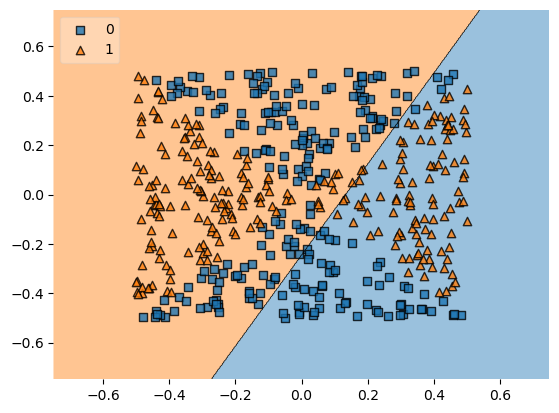

In [16]:
plot_decision_regions(X, y.astype(int), clf=svc, legend=2, zoom_factor=4);


#### Exercise 9.7.5 (h)

Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations,
colored according to the *predicted class labels*.

In [17]:
svm = SVC(C=1e3, random_state=0, degree=3, kernel='poly')
svm.fit(X, y)
y_hat_pred = svm.predict(X)

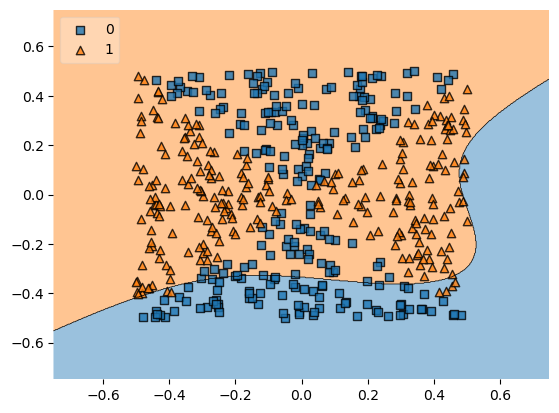

In [18]:
plot_decision_regions(X, y.astype(int), clf=svm, legend=2, zoom_factor=4);


#### Exercise 9.7.5 (i)

Comment on your results.

__Answer__:

- `LogisticRegression` as a linear classifier produces linear boundary; as expected in the [(d)](#Exercise-9.7.5-d);
- Applying polynomial features to the `LogisticRegression` makes an equation of the fit as:

  
$$
P(y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X^{2}_1 + \beta_4X_1X_2 + \beta_5X^{2}_2}}
$$ 

which obviously makes a decision boundary non-linear, 

- Polynomial SVM with `degree=3` is sufficient to cover the relationship between $X_1$, $X_2$ and $y$ as a dependent variable.

### Exercise 7.9.6 

At the end of the Section 9.6.1, it is claimed that in the case of data that is just barely linearly separable, a support vector classifier with a small value of C that misclassifies a couple of training observations may perform better on test data than one with a huge value of C that does not misclassify any training observations. You will now investigate this claim.

#### Exercise 9.7.6 (a)

Generate two-class data with $p=2$ in such a way that the classes are just barely linearly separable.

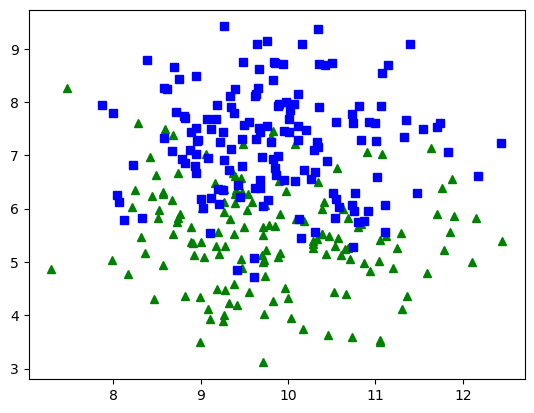

In [19]:
X, y = make_blobs(n_samples=300, centers=2, n_features=2, center_box=(0, 10), random_state=4)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.35, random_state=0, shuffle=True)

#### Exercise 9.7.6 (b) 

Compute the cross-validation error rates for support vector classifiers with a range of `C` values. How many training observations are missclassified for each value of `C` considered, and how does it relate to the cross-validation errors obtained?

__Answer__:

- `C` parameter with value 1, achieves the lowest training error among all examples. Trainig error for suchs specific value of `C` is around 0.17, so $83\%$ examples were classified correctly.

In [20]:
C = np.logspace(-5, 5, 15)
svc = LinearSVC(C=0.01, dual='auto')
kfold = KFold(5, random_state=0, shuffle=True)
grid = GridSearchCV(
    svc, 
    {'C': C},
    refit=True, 
    cv=kfold,
    scoring='accuracy'
)

grid.fit(X_train, y_train)
grid.cv_results_[('mean_test_score')]

scores = []
for accuracy, params in zip(grid.cv_results_[('mean_test_score')], grid.cv_results_.get('params')):
    test_error = 1 - accuracy
    C_reg = params.get('C')
    scores.append((params.get('C'), test_error))

min(scores, key=lambda key: key[1])

(1.0, 0.1743589743589744)

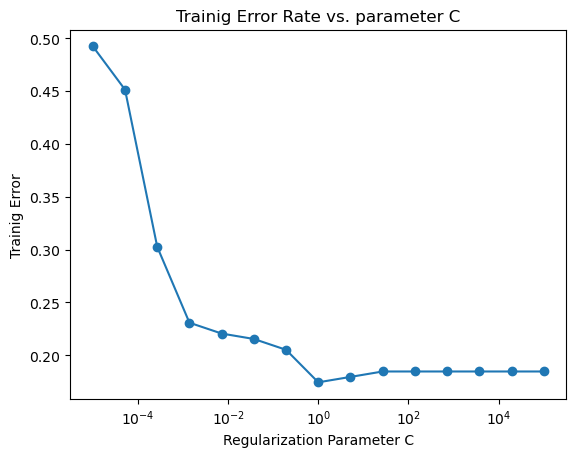

In [21]:
plt.title('Trainig Error Rate vs. parameter C')
plt.plot(list(map(lambda x: x[0], scores)), list(map(lambda x: x[1], scores)), marker='o');
plt.ylabel('Trainig Error')
plt.xlabel('Regularization Parameter C')
plt.xscale('log')

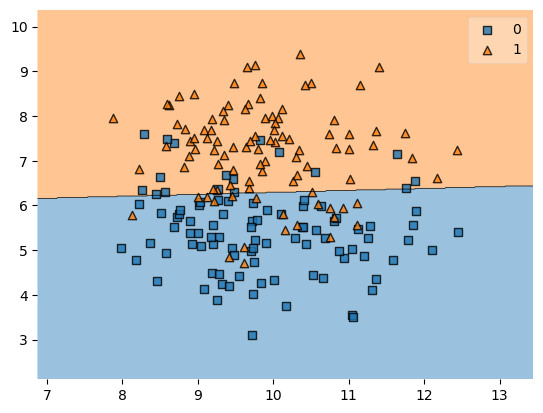

In [22]:
plot_decision_regions(X_train, y_train, grid.best_estimator_);

#### Exercise 9.7.6 (c)

Generate an appropriate test data set, and compute the test errors corresponding to each of the values of `C` considered. Which
value of `C` leads to the fewest test errors, and how does this compare to the values of `C` that yield the fewest training errors and the fewest cross-validation errors?

- In terms of test set, we can see that parameter `C=1` does not achieve the best result. The lowest test error are for greater values of `C` which indicate that it's smaller regularization effect, i.e. the margins are more wider which allows to potentially missclassified observations.

In [23]:
scores = []
for c in C:
    svc = LinearSVC(C=c, random_state=0, dual='auto')
    svc.fit(X_train, y_train)
    accuracy_score = svc.score(X_test, y_test)
    scores.append((c, 1 - accuracy_score))

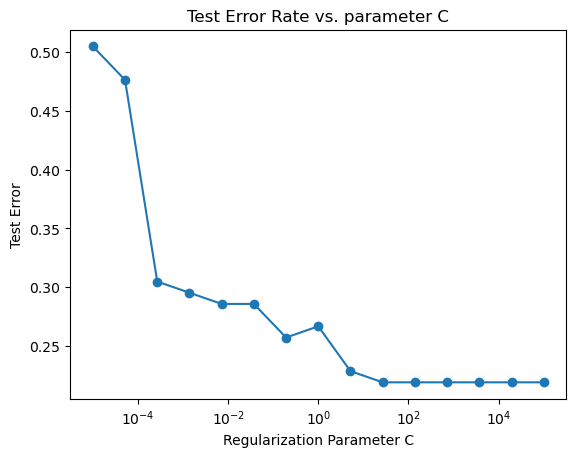

In [24]:
plt.title('Test Error Rate vs. parameter C')
plt.plot(list(map(lambda x: x[0], scores)), list(map(lambda x: x[1], scores)), marker='o');
plt.ylabel('Test Error')
plt.xlabel('Regularization Parameter C')
plt.xscale('log')

In [25]:
min(scores, key=lambda key: key[1])

(26.826957952797272, 0.21904761904761905)

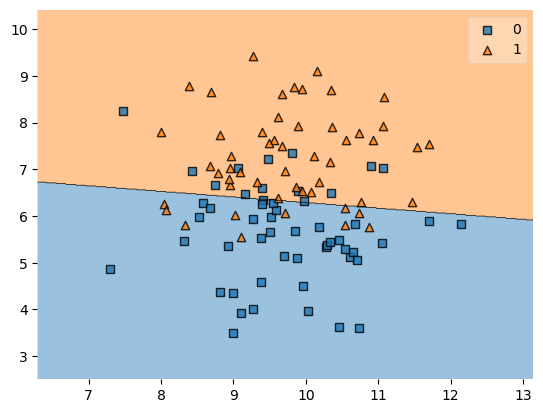

In [26]:
svc = LinearSVC(C=26, random_state=0, dual='auto')
svc.fit(X_train, y_train)
plot_decision_regions(X_test, y_test, svc);

### Exercise 9.7.7

In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the
`Auto` data set.

In [27]:
auto = load_data('Auto')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


#### Exercise 9.7.7 (a)

Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.

In [28]:
y_dep = (auto.mpg > auto.mpg.mean()).values.astype(int)
y_dep[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
auto.mpg.mean()

23.445918367346938

#### Exercise 9.7.7 (b)

Fit a support vector classifier to the data with various values of `C`, in order to predict whether a car gets high or low gas mileage.
Report the cross-validation errors associated with different values of this parameter. Comment on your results. Note you will need to fit the classifier without the gas mileage variable to produce sensible results.

__Answer__:

- We observe from the plot that, as $C$ increases, the train error rate generally decreases initially, then stabilizes or slightly increases beyond a certain point, this suggests that with higher values of $C$, the model initially learns better from the training data, but may start overfitting as $C$ becomes excessively large,
- At very low values of $C$, the error rates are relatively high, indicating that the model is underfitting; this is expected as low values of $C$ impose a less strict penalty on the margin violations, which allows more misslcasifications.

In [30]:
C_parameters = np.logspace(-5, 5, 15)
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
X, y = auto[auto.columns.drop(['mpg', 'name'])], y_dep

cv_test_error_rates = np.zeros(C_parameters.shape[0])
for i, C in enumerate(C_parameters):
    clf = SVC(kernel='linear', C=C, random_state=0)
    scores = cross_validate(clf, X, y, cv=kfold, return_estimator=True, scoring='accuracy')
    cv_test_error_rates[i] = 1 - scores['test_score'].mean()

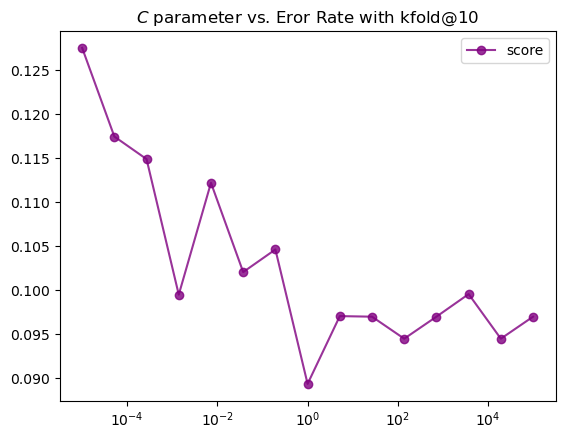

In [31]:
plt.title('$C$ parameter vs. Eror Rate with kfold@10')
plt.plot(C_parameters, cv_test_error_rates, marker='o', c='purple', alpha=0.8, label='score')
plt.xscale('log')
plt.legend();

#### Exercise 9.7.7 (c)

Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of gamma and degree and C. Comment on your results.

__Answer__:

- for the polynomial kernel, we observe that the choice of the degree parameter significantly influences the training error rate. Despite increasing values of C, indicating a higher penalty for misclassification, the training error rate varies with the degree of the polynomial kernel. This suggests that the complexity of the decision boundary, controlled by the degree parameter, plays a crucial role in model fitting. Notably, the lowest training error rate is achieved with a polynomial of degree 12 and C around $10^4$, indicating that a higher degree of polynomial allows the model to capture intricate relationships within the data.
- in the case of the radial kernel, the lowest training error rate is attained with a relatively low value of C ($10^0=1$) and a gamma value of $0.03$. This finding suggests that the data points are not intricately distributed, and the relationship between the dependent variable and predictors is not so sophisticated. The low $C$ value implies a less strict penalty for misclassification, indicating that the data can be well-separated by a simple decision boundary. Additionally, the optimal gamma value suggests that the influence of individual training samples is limited, further supporting the notion of a straightforward relationship between variables.

In [32]:
C_parameters = np.logspace(-5, 5, 15)
degrees = np.arange(15)
gammas = np.logspace(-4, 1, 15)
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
X, y = auto[auto.columns.drop(['mpg', 'name'])], y_dep

cv_radial_test_error_rates = np.zeros(C_parameters.shape[0])
cv_polynomial_test_error_rates = np.zeros(C_parameters.shape[0])
i = 0
for C, degree, gamma in zip(C_parameters, degrees, gammas):
    clf_poly = SVC(kernel='poly', C=C, degree=degree, random_state=0)
    clf_rbf = SVC(kernel='rbf', C=C, gamma=gamma, random_state=0)
    poly_scores = cross_validate(clf_poly, X, y, cv=kfold, return_estimator=True, scoring='accuracy')
    cv_polynomial_test_error_rates[i] = 1 - poly_scores['test_score'].mean()
    rbf_scores = cross_validate(clf_rbf, X, y, cv=kfold, return_estimator=True, scoring='accuracy')
    cv_radial_test_error_rates[i] = 1 - rbf_scores['test_score'].mean()
    i += 1


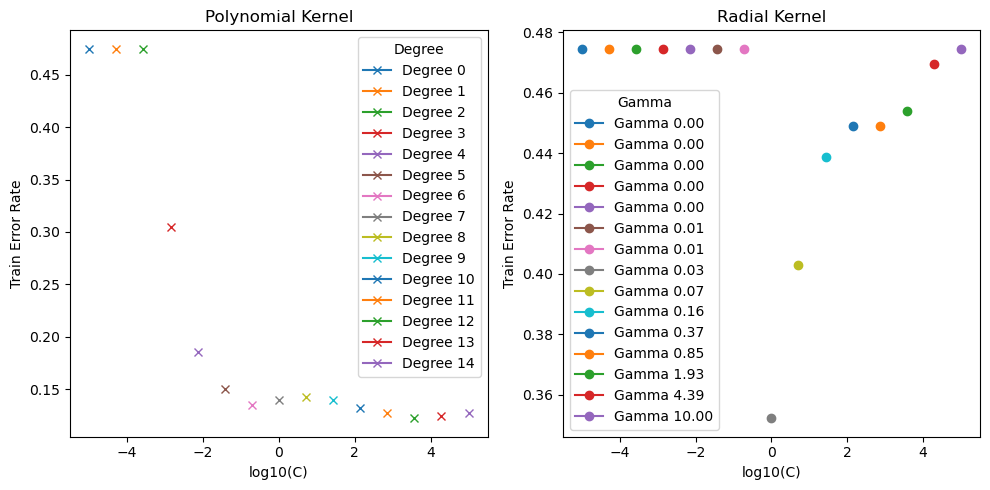

In [33]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for i in range(len(degrees)):
    plt.plot(np.log10(C_parameters[i]), cv_polynomial_test_error_rates[i::len(degrees)], label=f'Degree {degrees[i]}', marker='x')
plt.xlabel('log10(C)')
plt.ylabel('Train Error Rate')
plt.title('Polynomial Kernel')
plt.legend(title='Degree')

plt.subplot(1, 2, 2)
for i in range(len(gammas)):
    plt.plot(np.log10(C_parameters[i]), cv_radial_test_error_rates[i::len(gammas)], label=f'Gamma {gammas[i]:.2f}', marker='o')
plt.xlabel('log10(C)')
plt.ylabel('Train Error Rate')
plt.title('Radial Kernel')
plt.legend(title='Gamma')

plt.tight_layout();

#### Exercise 9.7.7 (d)

Make some plots to back up your assertions in (b) and (c).

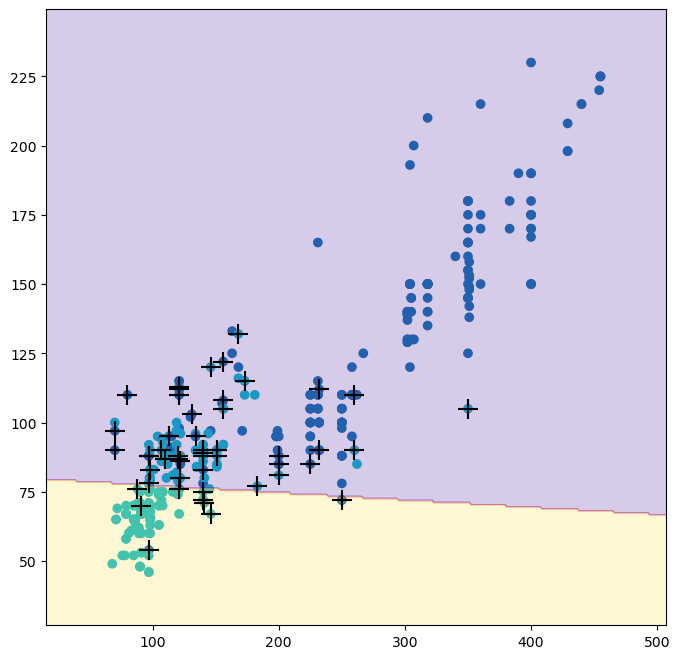

In [34]:
clf = SVC(kernel='linear', C=1, random_state=0)
clf.fit(X, y)
fig, ax = plt.subplots(figsize =(8 ,8))
plot_svm(X, y, clf, ax=ax, features=(1, 2));

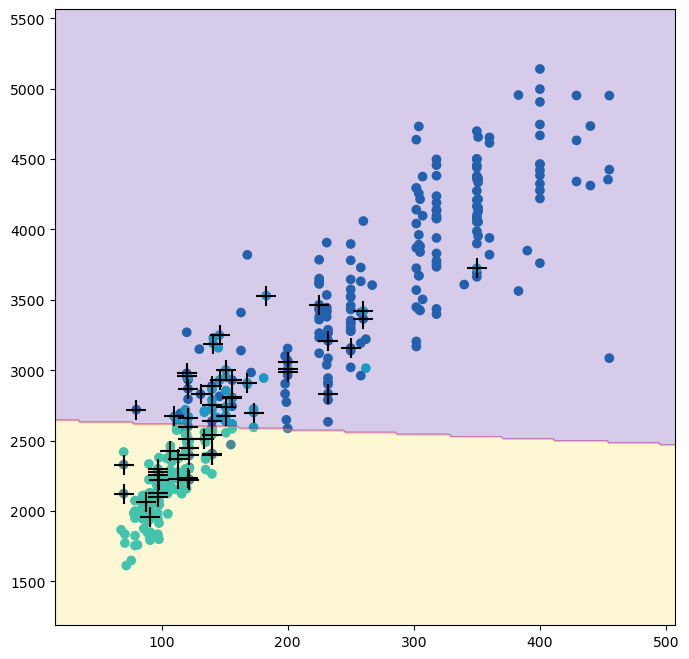

In [35]:
fig, ax = plt.subplots(figsize=(8 ,8))
plot_svm(X, y, clf, ax=ax, features=(1, 3))

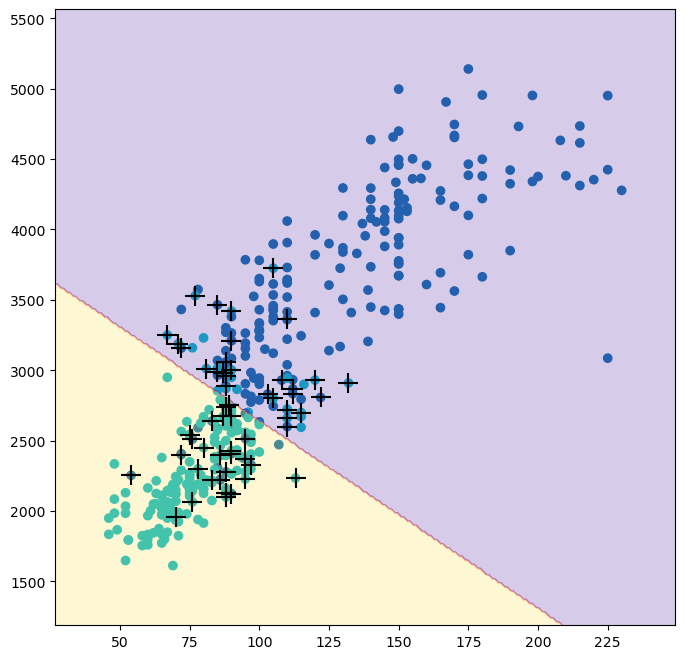

In [36]:
fig, ax = plt.subplots(figsize=(8 ,8))
plot_svm(X, y, clf, ax=ax, features=(2, 3))

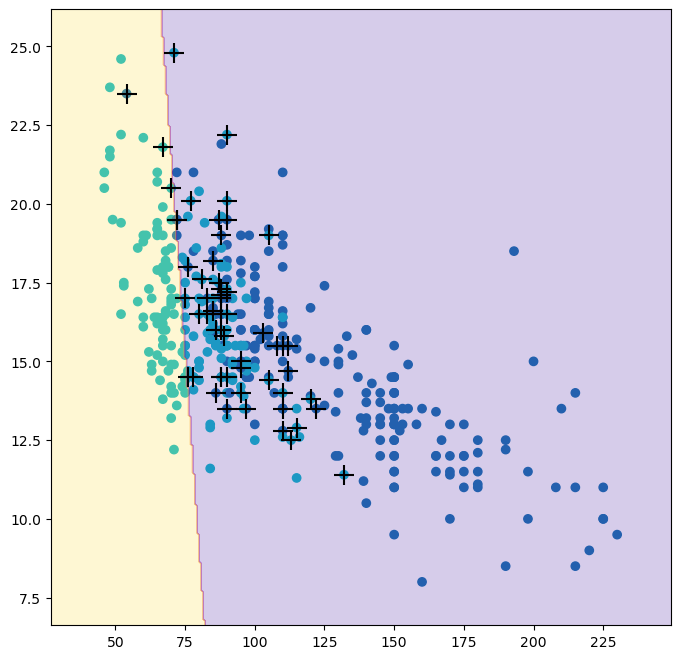

In [37]:
fig, ax = plt.subplots(figsize=(8 ,8))
plot_svm(X, y, clf, ax=ax, features=(2, 4));

In [38]:
poly = SVC(kernel='poly', degree=11, C=10e4)
poly.fit(X, y)

SVC(C=100000.0, degree=11, kernel='poly')

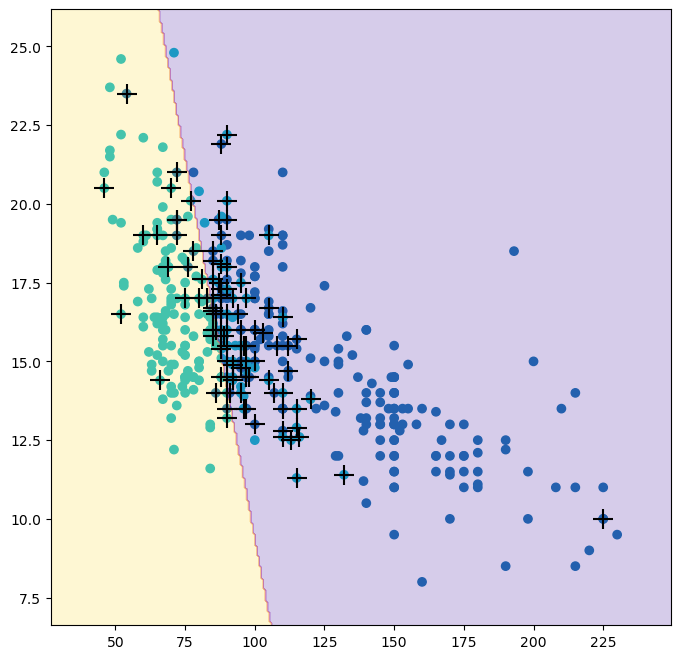

In [39]:
fig, ax = plt.subplots(figsize=(8 ,8))
plot_svm(X, y, poly, ax=ax, features=(2, 4));

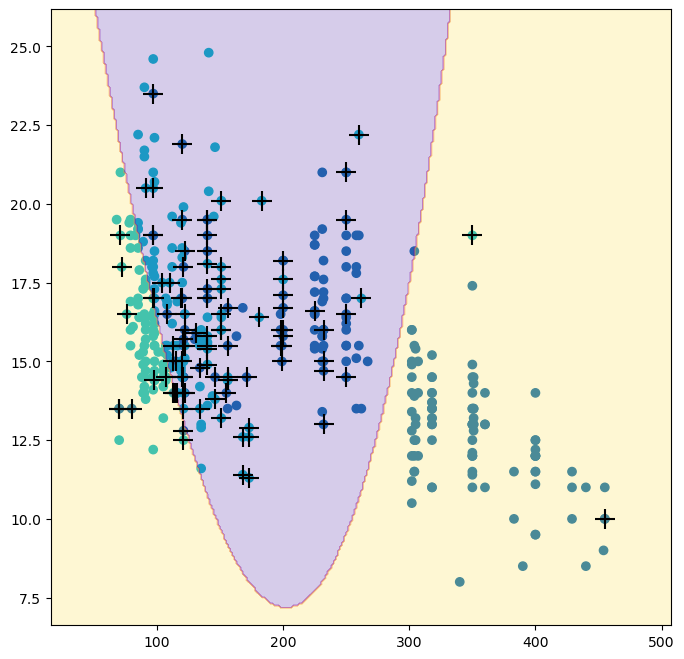

In [40]:
fig, ax = plt.subplots(figsize=(8 ,8))
plot_svm(X, y, poly, ax=ax, features=(1, 4));

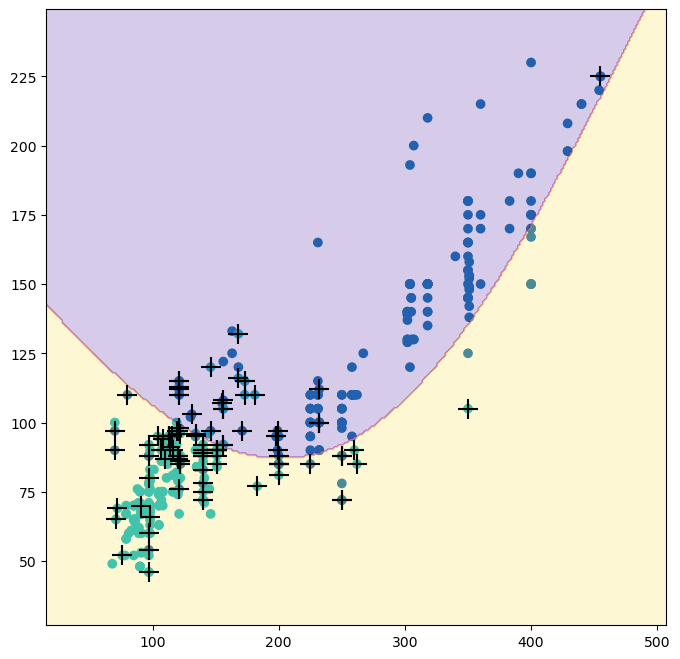

In [41]:
fig, ax = plt.subplots(figsize=(8 ,8))
plot_svm(X, y, poly, ax=ax, features=(1, 2));

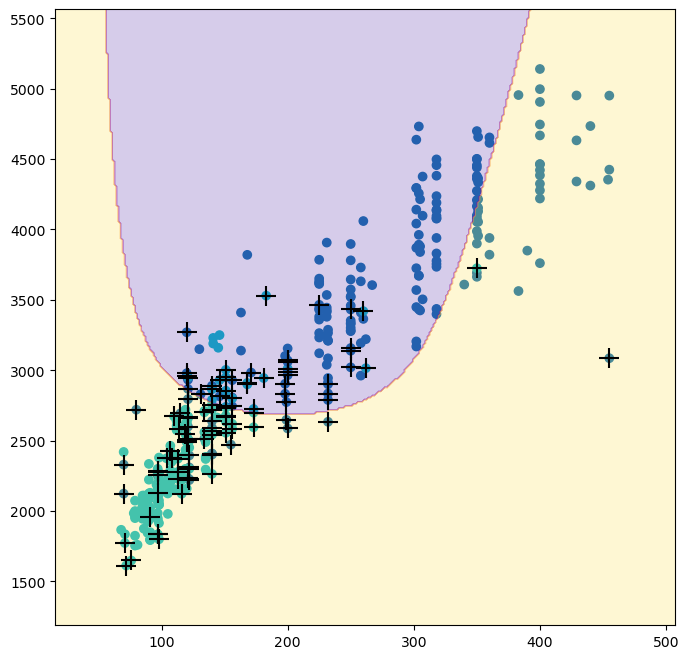

In [42]:
fig, ax = plt.subplots(figsize=(8 ,8))
plot_svm(X, y, poly, ax=ax, features=(1, 3));

### Exercise 9.7.8

This problem involves the `OJ` data set which is part of the ISLP package.

In [43]:
oj = load_data('OJ')
oj.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [44]:
oj.isna().sum()

Purchase          0
WeekofPurchase    0
StoreID           0
PriceCH           0
PriceMM           0
DiscCH            0
DiscMM            0
SpecialCH         0
SpecialMM         0
LoyalCH           0
SalePriceMM       0
SalePriceCH       0
PriceDiff         0
Store7            0
PctDiscMM         0
PctDiscCH         0
ListPriceDiff     0
STORE             0
dtype: int64

#### Exercise 9.7.8 (a)

Create a training set containing a random sample of 800 observations, and a test set containing remaining observations.

In [45]:
dependent_variable = oj['Purchase']
predictors = oj[oj.columns.drop('Purchase')]

lb = LabelBinarizer()
predictors.Store7 = lb.fit_transform(predictors['Store7'])

dependent_variable[dependent_variable == 'CH'] = 0
dependent_variable[dependent_variable == 'MM'] = 1

dependent_variable = dependent_variable.astype(int)

X_train, y_train = predictors.sample(n=800, random_state=0), dependent_variable.sample(n=800, random_state=0)
X_test, y_test = predictors[~predictors.index.isin(X_train.index)], dependent_variable[~dependent_variable.index.isin(y_train.index)]

#### Exercise 9.7.8 (b)

Fit a support vector classifier to the training data using `C = 0.01`, with `Purchase` as the response and the other variables as predictors. How many support points are there? 

In [46]:
svc_linear = SVC(kernel='linear', random_state=0, C=0.01)
svc_linear.fit(X_train, y_train)

SVC(C=0.01, kernel='linear', random_state=0)

In [47]:
len(svc_linear.support_vectors_)

608

#### Exericse 9.7.8 (c)

What are the training and test error rates?

In [48]:
training_error_rate = 1 - svc_linear.score(X_train, y_train)
test_error_rate = 1 - svc_linear.score(X_test, y_test)

print(f'Training error rate (LinearSVC): {training_error_rate}\nTest Error Rate (LinearSVC): {test_error_rate}')

Training error rate (LinearSVC): 0.23124999999999996
Test Error Rate (LinearSVC): 0.25555555555555554


#### Exercise 9.7.8 (d)

Use cross–validation to select an optimal `C`. Consider values in the range 0.01 to 10.

In [49]:
C_parameters = np.linspace(0.01, 10, 20)

kfold = KFold(n_splits=10, random_state=0, shuffle=True)
training_error_rates_cv = np.zeros(C_parameters.shape[0])
test_error_rates_cv = np.zeros(C_parameters.shape[0])

for i, C in enumerate(C_parameters):
    clf = SVC(kernel='linear', C=C, random_state=0)
    scores = cross_validate(clf, X_train, y_train, cv=kfold, return_estimator=True, scoring='accuracy')
    training_error_rates_cv[i] = 1 - scores['test_score'].mean()
    test_scores = cross_val_score(clf, X_test, y_test, cv=kfold, scoring='accuracy')
    test_error_rates_cv[i] = 1 - test_scores.mean()
    

In [50]:
C_parameters[np.argmin(test_error_rates_cv)]

1.0615789473684212

#### Exercise 9.7.8 (e)

Compute the training and test error rates using this new value of `C`.

In [51]:
svc_linear = SVC(kernel='linear', random_state=0, C=1.06)
svc_linear.fit(X_train, y_train)

SVC(C=1.06, kernel='linear', random_state=0)

In [52]:
training_error_rate = 1 - svc_linear.score(X_train, y_train)
test_error_rate = 1 - svc_linear.score(X_test, y_test)

print(f'Training error rate (LinearSVC, C=1.06): {training_error_rate}\nTest Error Rate (LinearSVC, C=1.06): {test_error_rate}')

Training error rate (LinearSVC, C=1.06): 0.15249999999999997
Test Error Rate (LinearSVC, C=1.06): 0.1962962962962963


#### Exercise 9.7.8 (f)

Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for gamma.

In [53]:
svc_rbf = SVC(kernel='rbf', random_state=0, C=0.01)
svc_rbf.fit(X_train, y_train)

SVC(C=0.01, random_state=0)

In [54]:
len(svc_rbf.support_vectors_)

622

In [55]:
training_error_rate = 1 - svc_rbf.score(X_train, y_train)
test_error_rate = 1 - svc_rbf.score(X_test, y_test)

print(f'Training error rate (RBF-SVC): {training_error_rate}\nTest Error Rate (RBF-SVC): {test_error_rate}')

Training error rate (RBF-SVC): 0.38875000000000004
Test Error Rate (RBF-SVC): 0.3925925925925926


In [56]:
C_parameters = np.linspace(0.01, 10, 20)

kfold = KFold(n_splits=10, random_state=0, shuffle=True)
training_error_rates_cv = np.zeros(C_parameters.shape[0])
test_error_rates_cv = np.zeros(C_parameters.shape[0])

for i, C in enumerate(C_parameters):
    clf = SVC(kernel='rbf', C=C, random_state=0)
    scores = cross_validate(clf, X_train, y_train, cv=kfold, return_estimator=True, scoring='accuracy')
    training_error_rates_cv[i] = 1 - scores['test_score'].mean()
    test_scores = cross_val_score(clf, X_test, y_test, cv=kfold, scoring='accuracy')
    test_error_rates_cv[i] = 1 - test_scores.mean()
    

In [57]:
C_parameters[np.argmin(test_error_rates_cv)]

0.01

In [58]:
svc_rbf = SVC(kernel='rbf', random_state=0, C=0.01)
svc_rbf.fit(X_train, y_train)

SVC(C=0.01, random_state=0)

In [59]:
training_error_rate = 1 - svc_linear.score(X_train, y_train)
test_error_rate = 1 - svc_linear.score(X_test, y_test)

print(f'Training error rate (LinearSVC, C=1.06): {training_error_rate}\nTest Error Rate (LinearSVC, C=1.06): {test_error_rate}')

Training error rate (LinearSVC, C=1.06): 0.15249999999999997
Test Error Rate (LinearSVC, C=1.06): 0.1962962962962963


#### Exercise 9.7.8 (g)

Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set `degree = 2`.

In [60]:
svc_poly = SVC(kernel='poly', random_state=0, C=0.01, degree=2)
svc_poly.fit(X_train, y_train)

SVC(C=0.01, degree=2, kernel='poly', random_state=0)

In [61]:
training_error_rate = 1 - svc_poly.score(X_train, y_train)
test_error_rate = 1 - svc_poly.score(X_test, y_test)

print(f'Training error rate (PolySVC, degree=2): {training_error_rate}\nTest Error Rate (PolySVC, degree=2): {test_error_rate}')

Training error rate (PolySVC, degree=2): 0.38875000000000004
Test Error Rate (PolySVC, degree=2): 0.3925925925925926


In [62]:
C_parameters = np.linspace(0.01, 10, 20)

kfold = KFold(n_splits=10, random_state=0, shuffle=True)
training_error_rates_cv = np.zeros(C_parameters.shape[0])
test_error_rates_cv = np.zeros(C_parameters.shape[0])

for i, C in enumerate(C_parameters):
    clf = SVC(kernel='poly', C=C, random_state=0, degree=2)
    scores = cross_validate(clf, X_train, y_train, cv=kfold, return_estimator=True, scoring='accuracy')
    training_error_rates_cv[i] = 1 - scores['test_score'].mean()
    test_scores = cross_val_score(clf, X_test, y_test, cv=kfold, scoring='accuracy')
    test_error_rates_cv[i] = 1 - test_scores.mean()
    

In [63]:
C_parameters[np.argmin(test_error_rates_cv)]

0.01

In [64]:
svc_rbf = SVC(kernel='rbf', random_state=0, C=0.01, degree=2)
svc_rbf.fit(X_train, y_train)

SVC(C=0.01, degree=2, random_state=0)

In [65]:
training_error_rate = 1 - svc_linear.score(X_train, y_train)
test_error_rate = 1 - svc_linear.score(X_test, y_test)

print(f'Training error rate (PolySVC, degree=2, C=0.01): {training_error_rate}\nTest Error Rate (PolySVC, degree=2, C=0.01): {test_error_rate}')

Training error rate (PolySVC, degree=2, C=0.01): 0.15249999999999997
Test Error Rate (PolySVC, degree=2, C=0.01): 0.1962962962962963


#### Exercise 9.7.8 (h)

__Answer__:

- the linear approach is the best in this setting. Perhaps, the method like Polynomial or RBF are too much flexible for such linear relationship  and they perform worse.